# MA934 - class 4

*Student ID: 2260253*

## Task 1 - Solving a simple linear programme

In [1]:
# Import libraries
import time
import numpy as np
from numpy import linalg as la
import random
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

Vertices $(x_1, x_2)$ are found by finding the points of intersections between those lines which intersect, namely

$$1: \; 2\, x_1 + x_2 = 70 $$
$$2: \; x_1 + 3\, x_2 = 90 $$
$$3:  \; 3\, x_1 + x_2 = 46 $$
$$4:  \; x_1 + 4\, x_2 = 52 $$

This is done by solving four systems each of two linear equations

In [2]:
vertices = np.zeros((4,2))

# system of equations 2 and 3
A = np.array([[1,3],[3,1]])
b = np.array([90,46])
vertices[0,:] = la.solve(A,b)

# system of equations 1 and 2
A = np.array([[2,1],[1,3]])
b = np.array([70,90])
vertices[1,:] = la.solve(A,b)

# system of equations 1 and 4
A = np.array([[2,1],[1,4]])
b = np.array([70,52])
vertices[2,:] = la.solve(A,b)

# system of equations 3 and 4
A = np.array([[3,1],[1,4]])
b = np.array([46,52])
vertices[3,:] = la.solve(A,b)

vertices

array([[ 6.        , 28.        ],
       [24.        , 22.        ],
       [32.57142857,  4.85714286],
       [12.        , 10.        ]])

Plotting the search space. The feasible set is defined as the paralellogram whose vertices are black dots 

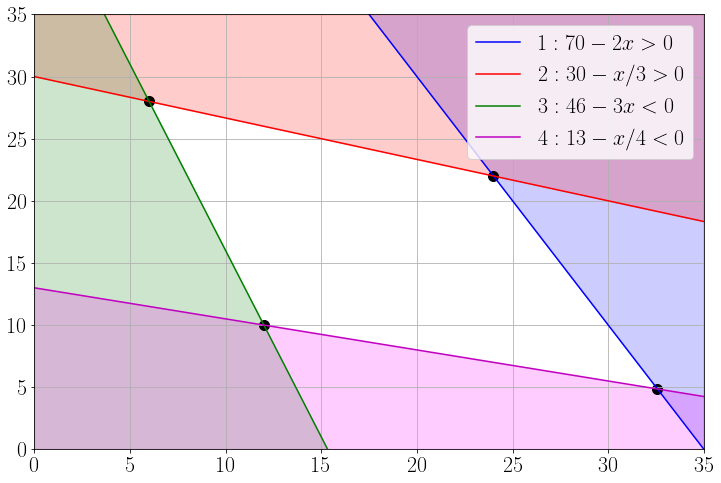

In [3]:
# reasonable search space for x1 is (0,35) from constraint 1
x = np.arange(0.0, 35.01, 0.1)

# defining functions returning the four constraints in terms of x2
def f1(inputlist):
    return [70.0 - 2.0*i for i in inputlist]

def f2(inputlist):
    return [30.0 - i/3.0 for i in inputlist]

def f3(inputlist):
    return [46.0 - 3.0*i for i in inputlist]

def f4(inputlist):
    return [13.0 - i/4.0 for i in inputlist]


# Plot inequalities
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(12, 8))

plt.plot(x, f1(x), "b-", label = "$1: 70-2x>0$")
plt.fill_between(x, f1(x), 35.0, color='blue', alpha=.2)

plt.plot(x, f2(x), "r-", label = "$2: 30-x/3>0$")
plt.fill_between(x, f2(x), 35.0, color='red', alpha=.2)

plt.plot(x, f3(x), "g-", label = "$3: 46-3x<0$")
plt.fill_between(x, 0.0, f3(x), color='green', alpha=.2)

plt.plot(x, f4(x), "m-", label = "$4: 13-x/4<0$")
plt.fill_between(x, 0.0, f4(x), color='magenta', alpha=.2)

# points of intersection encompassing paralellogram
plt.scatter(vertices[:,0], vertices[:,1], color='k', s=100)

plt.legend(loc="upper right")

plt.xlim([0.0, 35.0])
plt.ylim([0.0, 35.0])

plt.grid()
plt.show()

Checking the cost function evaluated at the vertices

In [4]:
# cost function we aim to minimize
def cost(x1,x2):
    return -40*x1 - 60*x2

In [5]:
for k in range(4):
    print('x1 = %.1f' % vertices[k,0])
    print('x2 = %.1f' % vertices[k,1])
    print('Cost: %.1f' % cost(vertices[k,0],vertices[k,1]))
    print('\n')

x1 = 6.0
x2 = 28.0
Cost: -1920.0


x1 = 24.0
x2 = 22.0
Cost: -2280.0


x1 = 32.6
x2 = 4.9
Cost: -1594.3


x1 = 12.0
x2 = 10.0
Cost: -1080.0




Our solution is therefore $(x_1, x_2) = (24,22)$

## Task 2 - Dantzig simplex algorithm

Introducing slack variables $\{s_1, s_2, s_3, s_4\}$, we write the problem as follows:

$$\min_{\substack{(x_1, x_2) \in \mathbb{R}^2} } -40\, x_1 - 60\, x_2$$

subject to the constraints

$$\begin{align*}
2 x_1 + x_2 + s_1 &= 70 \\
x_1 + 3 x_2 + s_2 &= 90 \\
-3 x_1 - x_2 + s_3 &= -46 \\
-x_1 - 4 x_2 + s_4 &= -52
\end{align*}$$

In standard form we are solving:

$$\min_{\substack{\mathbf{x} \in \mathbb{R}^6} } f(\mathbf{x}) = \mathbf{c}\cdot\,\mathbf{x}$$

where

$$\mathbf{c} = 
\begin{pmatrix}
-40 & -60 & 0 & 0 & 0 & 0
\end{pmatrix}$$

subject to four equality constraints, represented in matrix form

$$A \mathbf{x} = \mathbf{b}$$

with

$$A = 
\begin{pmatrix}
2 & 1 & 1 & 0 & 0 & 0 \\
1 & 3 & 0 & 1 & 0 & 0 \\
-3 & -1 & 0 & 0 & 1 & 0 \\
-1 & -4 & 0 & 0 & 0 & 1 
\end{pmatrix}$$

$$\mathbf{x} = \begin{pmatrix}
x_1 \\
x_2 \\
s_1 \\
s_2 \\
s_3 \\
s_4
\end{pmatrix}$$

and

$$\mathbf{b} = \begin{pmatrix}
70 \\
90 \\
-46 \\
-52
\end{pmatrix}$$

and six non-negativity conditions
$$
x_1,x_2,s_1,s_2,s_3,s_4 \geq 0 .
$$

Finding a basic feasible vector in $\mathbb{R}^6$ for the vertex $(x_1,x_2) = (12,10)$

In [6]:
x1 = 12
x2 = 10

#Solving backwards for s_i's
s1 = 70 - 2*x1 - x2
s2 = 90 - x1 - 3*x2
s3 = 3*x1 + x2 - 46
s4 = x1 + 4*x2 - 52

x_bfv = np.array([x1,x2,s1,s2,s3,s4])
print(x_bfv)

[12 10 36 48  0  0]


Dantzig revised simplex algorithm

In [7]:
def Dantzig(x_bfv, A, c, track_guesses=False):
    # function which employs the Dantzig revised simplex algorithm for our
    # given linear programme, with the following inputs:
    # x_bfv: initial basic feasible vector (assuming it exists)
    # A: matrix giving equality constraints when problem is written in standard form
    # c: cost vector
    # track_guesses: allows us to see searches before we arrived at our optimal
    
    # get indices of the basic and non-basic variables and splitting A,c and basic
    # feasible vector into its basic and non-basic components accordingly
    idx_nonbasic = np.where(x_bfv == 0)[0]
    idx_basic = np.nonzero(x_bfv)[0]
    
    x_nonbasic = x_bfv[idx_nonbasic]
    x_basic = x_bfv[idx_basic]            # x basic
    
    A_basic = A[:,:idx_nonbasic[0]]       # B
    A_nonbasic = A[:,idx_nonbasic[0]:]    # N
    Ainv_basic = la.inv(A_basic)          # B^-1
    
    c_basic = c[:idx_nonbasic[0]]
    c_nonbasic = c[idx_nonbasic[0]:]
    
    # objective function f(x) = c x
    obj_cost = c_basic@x_basic
    
    # number of basic and non-basic variables
    N_b = len(x_basic)
    N_nb = len(x_nonbasic)

    # gradient of objective function
    gradf_nb = np.zeros(N_nb)
    
    # stores vertices searched by Dantzig and corresponding objective function value
    searched_vertices = np.array([x_basic[0],x_basic[1],obj_cost])
    
    # if our gradient is always decreasing in the algorithm we will check
    # remaining n-1 vertices
    l = 0
    while l < N_b-1:
        
        # get index to non-basic variable to make basic
        for i in range(N_nb):
            gradf_nb[i] = c[idx_nonbasic[i]] - c_basic@Ainv_basic@A[:,idx_nonbasic[i]]
        
        # terminate search if we arrive at point where we cannot decrease any
        # further
        if gradf_nb.min() >= 0:
            break
        
        # non_basic index
        q = idx_nonbasic[np.argmin(gradf_nb)]

        # get index to basic variable to make non-basic
        # w == column generation (a^hat pq)
        w = Ainv_basic@A[:,q]

        # sanity check to make sure problem is not unbounded
        if w.max() < 0:
            raise Exception('Error: Problem is unbounded')
        
        # xk stores xj/wj computations of which we require a non-negative
        # minimum as we seek to find basic variable xi which hits zero
        # first as non-basic variable x[q] increases
        xk = np.ones(N_b)*1e4
        
        for j in range(N_b):
            if w[j] >= 0:
                xk[j] = x_basic[j]/w[j]

        # basic index
        p = idx_basic[np.argmin(xk)]
        alpha = xk[p]

        # row reductions
        Ep = np.identity(N_b)
        Ep[:,p] = -w/w[p]
        Ep[p,p] = 1/w[p]

        Ainv_basic = Ep@Ainv_basic

        # swapping columns of A and c
        A[:,[q, p]] = A[:,[p, q]]
        c[[q, p]] = c[[p, q]]

        # updating x basic and objective cost
        x_basic = x_basic - alpha*w
        x_basic[p] = alpha
        obj_cost = c_basic@x_basic
        
        # update searched vertices
        new_eval = np.array([x_basic[0], x_basic[1], obj_cost])
        searched_vertices = np.vstack(( searched_vertices, new_eval ))
        
        l += 1
    
    # returns an array of three entries, with (list[0], list[1]) being the
    # solution to our LP, followed by the objective function evaluated at
    # the solution
    if track_guesses == True:
        return searched_vertices
    
    else:
        return searched_vertices[-1,:]

In [8]:
# inputs
x_bfv = np.array([x1,x2,s1,s2,s3,s4])
A = np.array([[2,1,1,0,0,0],[1,3,0,1,0,0],[-3,-1,0,0,1,0],[-1,-4,0,0,0,1]])
c = np.array([-40,-60,0,0,0,0])

# solution
LPsol = Dantzig(x_bfv, A, c, True)
print(LPsol)
print('\n')
print('Optimal solution found at vertex', LPsol[-1,:2], 'with objective cost', LPsol[-1,-1])

[[   12.    10. -1080.]
 [    6.    28. -1920.]
 [   24.    22. -2280.]]


Optimal solution found at vertex [24. 22.] with objective cost -2280.0


## Task 3 - Gradient descent

Consider the following optimisation problem in $\mathbb{R}^n$

$$\min_{\substack{\mathbf{x} \in \mathbb{R}^n} } f(\mathbf{x})$$

where $f(\mathbf{x})$ is the quartic function defined as

$$ f(\mathbf{x}) = \frac{1}{4} \left( (\mathbf{x} - \mathbf{x}_*)^T A\cdot (\mathbf{x} - \mathbf{x}_*)\right)^2 $$

with 

$$ A = \left( 
\begin{array}{ccccc} 
\frac{\lambda+1}{2} & \frac{\lambda - 1}{2} & 0 &\ldots & 0\\ 
\frac{\lambda-1}{2} & \frac{\lambda + 1}{2} & 0 &\ldots & 0\\
0 & 0 & 1 &\ldots & 0\\ 
\vdots & \vdots & \vdots &\ddots & \vdots\\ 
0 & 0 & 0 &\ldots & 1
\end{array}
\right),
$$
$$
\mathbf{x}_* = \left( \begin{array}{c}
\sqrt{2}\\
\sqrt{3}\\
1\\
\vdots\\
1
\end{array}
\right)
$$
and $\lambda > 0$ is a parameter that controls the shape of the objective function. A reasonable range of values for $\lambda$ is $\frac{1}{10} \leq \lambda \leq 10$.

*Write down the solution of this problem*

Solution exists at $\mathbf{x} = \mathbf{x}_\star$, corresponding to $f(\mathbf{x}_\star) = 0$

*Write down the eigenvalues of the matrix $A$*

$$|A - \kappa I_n| = \big{(}\frac{\lambda+1}{2} - \kappa\big{)}\big{(}\frac{\lambda+1}{2} - \kappa\big{)}(1-\kappa)...(1-\kappa) - \big{(}\frac{\lambda+1}{2}\big{)}^2(1-\kappa)...(1-\kappa) = 0$$

$$\implies (1-\kappa)...(1-\kappa)(\lambda - (\lambda+1)\kappa + \kappa^2) = 0$$

$$\implies \kappa = 1, \; \frac{\lambda+1\pm\sqrt{(\lambda-1)^2}}{2}$$

$$\implies \kappa = 1, \; \lambda$$

*Derive a formula for the gradient, $\nabla f(\mathbf{x})$, at any point in $\mathbb{R}^n$.*

Letting

$$\mathbf{r = x - x_\star}$$

We compute the matrix derivative using the Chain Rule ( $^\ast$ denoting element-wise multiplication)

$$\nabla_\mathbf{x} f(\mathbf{x}) = \nabla_\mathbf{r} f(\mathbf{r}) ^\ast \nabla_\mathbf{x} \mathbf{r}$$

$$\nabla_\mathbf{x} f(\mathbf{x}) = \nabla_\mathbf{r} \Big{(}\frac{1}{4}(\mathbf{r}^T A \mathbf{r})^2\Big{)} ^\ast \mathbf{1}$$

$$\nabla_\mathbf{x} f(\mathbf{x}) = \frac{1}{2}(\mathbf{r}^T A \mathbf{r}) (2 A \mathbf{r})$$

$$\nabla_\mathbf{x} f(\mathbf{x}) = \Big{(}(\mathbf{x - x_\star})^T A (\mathbf{x - x_\star})\Big{)} \Big{(}A (\mathbf{x - x_\star})\Big{)}$$

*Use your results to implement the gradient descent algorithm in Python. Use your algorithm to numerically solve the above problem with $n=2$ and $\lambda=2$. A good initial point is $\mathbf{x}_0 = 5\,\mathbf{x}_\star$.  A good tolerance is $\varepsilon = 10\, \epsilon_m$. **Note:** You will need to write your own Golden Section Search code as part of this task, which is a small subproblem in itself. Make sure you verify your implementation with smaller datasets before deploying it within the context of the larger problem*

In [9]:
# inputs
n = 2
lamb = 2
eps = 1e-15

# fixed point
xstar = np.ones(n)
xstar[0] = np.sqrt(2.0)
xstar[1] = np.sqrt(3.0)

# matrix
A = np.zeros((n,n))
A[0,0] = (lamb+1)/2
A[1,1] = (lamb+1)/2
A[0,1] = (lamb-1)/2
A[1,0] = (lamb-1)/2

# quartic function to be minimised and its corresponding gradient
def f(x):
    global A, xstar
    r = x-xstar
    return 0.25*(np.transpose(r)@A@r)**2

def df(x):
    global A, xstar
    r = x-xstar
    return (np.transpose(r)@A@r)*(A@r)

Custom Golden Search algorithm which will be needed to perform line minimisation

In [10]:
def GoldenSearch(f, interval, tol, find_max=False):
    # function which searches for minimum of f(x) via a bracketing-and-bisection method
    # triple = (a c b) must bracket the minimum such that f(c) < f(a) and f(c) < f(b)
    
    # if maximum required we seek a minimum of -f(x)
    if find_max == True:
        def g(x):
            return -f(x)
        
    else:
        def g(x):
            return f(x)
    
    [a, b] = interval
    w = (np.sqrt(5)-1)/2
    # choosing c (makes (c, b) the larger interval)
    c = (b + w*a)/(1 + w)
    
    # perform search until interval length falls below specified tolerance
    while b - a > tol:
        
        # case (c, b) is the larger interval
        if np.abs(b - c) > np.abs(c - a):
            x = c + (1 - w)*(b - c)
            if g(c) < g(x):
                [a, c, b] = [a, c, x] # case 1A: c bracketed by (a, x)
            else:
                [a, c, b] = [c, x, b] # case 1B: x bracketed by (c, b)
                
        # case (a, c) is the larger interval        
        else:
            x = c - (1 - w)*(c - a)
            if g(c) < g(x):
                [a, c, b] = [x, c, b] # case 2A: c bracketed by (x, b)
            else:
                [a, c, b] = [a, x, c] # case 2B: x bracketed by (a, c)
  
    
    return c

Testing the Golden Search algorithm

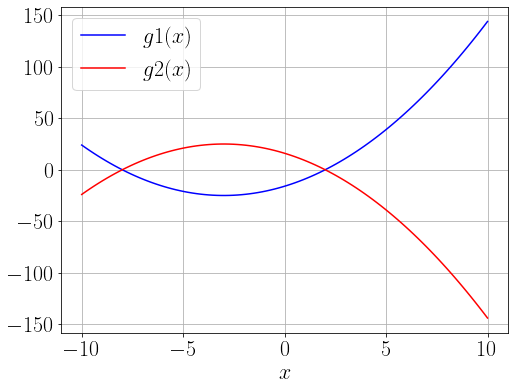

In [11]:
# simple test function 1 - minimum should exist at g1'(x) = 0 => x = -3
def g1(x):
    return x**2 + 6*x - 16

# simple test function 2 - require a maximum at g2'(x) = 0 => x = -3
def g2(x):
    return -x**2 - 6*x + 16

xs = np.linspace(-10,10,100)
fig = plt.figure(figsize=(8,6))
plt.plot(xs,g1(xs),'b',label='$g1(x)$')
plt.plot(xs,g2(xs),'r',label='$g2(x)$')
plt.xlabel('$x$')
plt.grid()
plt.legend(loc='best')

In [12]:
# testing
xmin = -3.0
xmax = -3.0
print('Golden Search finds minimum for g1(x) at x = %.4f' % GoldenSearch(g1, [-6,0], 1e-10))
print('Golden Search finds maximum for g2(x) at x = %.4f' % GoldenSearch(g2, [-6,0], 1e-10, find_max=True))

Golden Search finds minimum for g1(x) at x = -3.0000
Golden Search finds maximum for g2(x) at x = -3.0000


Define a function to perform the gradient descent

In [13]:
def gradient_descent(f, df, x0, tol, track_convergence=False):
    # function designed to find the __minimum__ of f(x) taking x in R^n using
    # method of steepest descent, taking inputs:
    # f: function to be minimised
    # df: gradient of f
    # x0: initial starting point
    # tol: tolerance required for convergence
    # track_convergence: if true we will keep track of the norm of df at each
    # iteration
    
    xn = x0 # initial guess
    vn = -df(xn)/la.norm(df(xn)) # position vector
    guesses = xn # matrix which will store xn at each iteration
    
    # function which allows to find the line minimiser of f when implemented
    # into Golden Search
    def line_minimiser(lamb):
        return f(xn + lamb*vn)
    
    while la.norm(df(xn)) > tol:
        #perform line minimisation using Golden Search
        lamb_min = GoldenSearch(line_minimiser, [0,20], 1e-14)
        
        #updating xn in direction of steepest descent
        xn = xn + lamb_min*vn
        
        #updating vn
        vn = -df(xn)/la.norm(df(xn))
        
        # stacking guesses vertically with our current estimation for xn
        if track_convergence == True:
            guesses = np.vstack((guesses,xn))

    
    if track_convergence == True:
        return guesses
    
    else:
        return xn

We now perform the gradient descent

In [14]:
gradient_descent(f, df, 5*xstar, eps, False)

array([1.41421304, 1.7320513 ])

This is approximately $(\sqrt{2}, \, \sqrt{3})$, so it seems to have converged!

*Plot how the distance from the minimum decreases as a function of the number of iterations and empirically determine the convergence rate of the algorithm.*

In [15]:
# re-gather the gradient descent iterations
x_guesses = gradient_descent(f, df, 5*xstar, eps, True)
N_iter = np.shape(x_guesses)[0]

# ...and their absolute errors
rs = x_guesses - xstar*np.ones(np.shape(x_guesses))
                               
distances = np.zeros(N_iter)
for i in range(N_iter):
    distances[i] = la.norm(rs[i,0])
print(distances)

[5.65685425e+00 3.25449103e-01 7.17034115e-03 4.12522484e-04
 9.08885581e-06 5.22887398e-07]


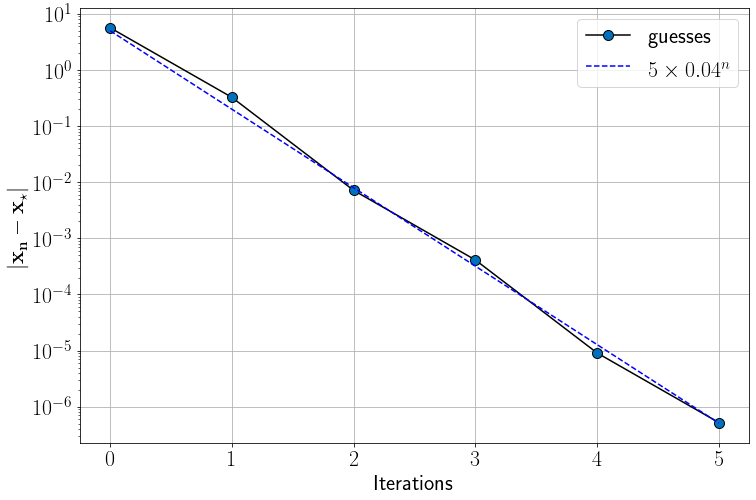

In [16]:
#plotting
plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(12, 8))
c = 0.04
plt.plot(range(N_iter), distances, '-ko', markersize=10, markerfacecolor=(0, 0.447, 0.741, 1),label='guesses')
plt.plot(range(N_iter), [5*c**i for i in range(N_iter)], '--b',label='$5 \\times 0.04^n$')

plt.xlabel(r"Iterations")
plt.ylabel(r"$|\mathbf{x_n - x_\star}|$")
plt.yscale("log")
plt.legend(loc='upper right')
plt.grid()
plt.show()

The convergence of the algorithm seems to scale as $K c^n$, where $c < 1$ required for convergence. Empirically, we can estimate $K = 5$ and $c = 0.04$.

*Determine empirically how the number of steps required to solve the problem varies with $\lambda$ when $n=3$*

In [17]:
# inputs
n = 3

# fixed point
xstar = np.ones(n)
xstar[0] = np.sqrt(2.0)
xstar[1] = np.sqrt(3.0)

# matrix (fixed values - will allocate lambda-dependent entries in a loop)
A = np.zeros((n,n))
A[-1,-1] = 1

In [18]:
# performing gradient descent for n= 3 and varying lambda
lambs = np.arange(0.1,10.1,0.1)
no_steps = np.zeros(len(lambs))

for i in range(len(lambs)):
    lamb = lambs[i]
    A[0,0] = (lamb+1)/2
    A[1,1] = (lamb+1)/2
    A[0,1] = (lamb-1)/2
    A[1,0] = (lamb-1)/2

    result = gradient_descent(f, df, 5*xstar, eps, True)
    no_steps[i] = np.shape(result)[0]

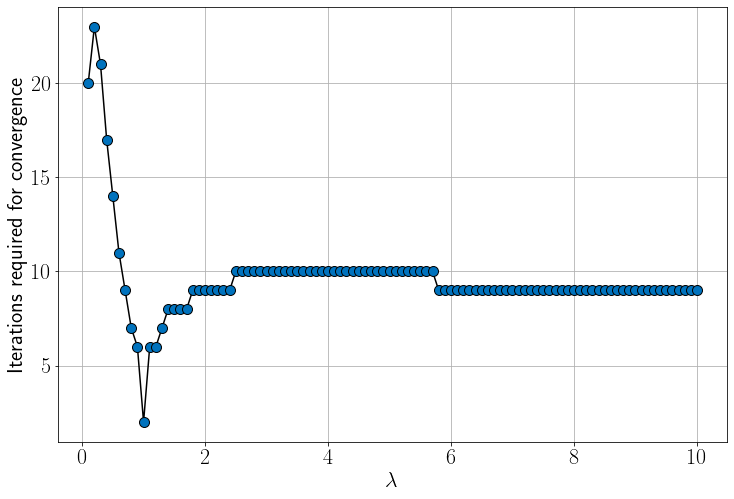

In [19]:
#plotting
plt.figure(figsize=(12, 8))

plt.plot(lambs, no_steps, '-ko', markersize=10, markerfacecolor=(0, 0.447, 0.741, 1))

plt.xlabel(r"$\lambda$")
plt.ylabel(r"Iterations required for convergence")
plt.grid()
plt.show()

Since the eigenvalues of $A$ are $\lambda$ and $1$ respectively we would expect optimal convergence for $\lambda = 1$. As $\lambda$ decreases away from $1$ the number of iterations required for convergence increases steadily. While the number of iterations required for convergence increases steadily when we increase $\lambda$ from $1$, it begins to plateau near $\lambda = 2$. Exposing our gradient descent algorithm to a more difficult problem or a starting guess further from $\mathbf{x}_\star$ may allow for more inference in regards to iterations until convergence for varying $\lambda$.

## Task 4 - Stochastic gradient descent

Consider the following linear model expressing a noisy relationship between a target variable, $y \in \mathbb{R}$ and a set of predictor variables, $\mathbf{x} \in \mathbb{R}^n$:

$$ y = \mathbf{\alpha}^T \, \mathbf{x} + \xi $$

where $\mathbf{\alpha} \in \mathbb{R}^n$ is a set of parameters and $\xi \sim N(0, \sigma^2)$ is a normal random variable with mean 0 and variance $\sigma^2$ representing the error. We are given a set of $m$ observations

$$Y = \left\{(\mathbf{x}^{(i)},\, y^{(i)})\ : i=1\ldots m \right\}$$

Our task is to find the "best" set of parameters, $\mathbf{\alpha}_*$ given the observations by solving the ordinary least squares problem:

$$\mathbf{\alpha}_* = \min_{\substack{\mathbf{\alpha} \in \mathbb{R}^n} } F(\mathbf{\alpha}\, |\, Y)$$

where

$$ F(\mathbf{\alpha}\, |\, Y) = \frac{1}{2}\, \frac{1}{m} \sum_{i=1}^m\left( y^{(i)} - \mathbf{\alpha}^T\,\mathbf{x}^{(i)}\right)^2$$

Create a test problem with the following specifications (obviously you can vary the parameters):

```
n=10
m=100
xmax = 10.0
sigma = 0.25
```

* Solve the problem using the gradient descent code you have written above. Due to the noise, you should not expect to recover the exact "true" value of $\alpha_*$ used to generate the test data but you should be close if the noise is not too large.
* Modify your code to do the optimisation using stochastic gradient descent and compare the results graphically.
* Fix $n=10$ and $m=250$. Compare the performance of your stochastic gradient descent algorithm with different learning rates. Can you find one that performs well?

**Hint:** for both Task 3 and Task 4 you may wish to consult [the provided resources](https://warwick.summon.serialssolutions.com/#!/search/document?ho=t&include.ft.matches=f&fvf=ContentType,Newspaper%20Article,t%7CContentType,Book%20Review,t&l=en-UK&q=Understanding%20Machine%20Learning:%20From%20Theory%20to%20Algorithms&id=FETCHMERGED-warwick_catalog_b279036183) on the module webpage, as well as [nicely explained tutorials](https://realpython.com/gradient-descent-algorithm-python/) on the subject matter. This will help you craft your own code and specialise it for the problems at hand.

In [ ]:
# inputs
n = 10
m = 100
xmax = 10.0
sigma = 0.25

In [ ]:
# generate test data
def ys(xs):
    global alpha
    return np.dot(alpha,xs) + np.random.normal(0, sigma, size=1)

alpha = np.ones(n)

Y = np.ones(n+1)

for i in range(m):
    xs = np.random.uniform(low=0,high=xmax,size=n)
    xs = np.hstack(( xs,ys(xs) ))
    Y = np.vstack(( Y, xs ))

Y = Y[1:,:]

In [ ]:
# least squares problem
def LSQ(alpha):
    global Y
    
    loss = 0
    for i in range(m):
        loss += (Y[i,-1] - np.dot(alpha,Y[i,:-1]))**2
    
    return loss/(2*m)

In [ ]:
# gradient
def gradLSQ(alpha):
    global Y
    
    grad_loss = np.zeros(n)
    for j in range(n):
        for i in range(m):
            grad_loss[j] += (Y[i,-1] - np.dot(alpha,Y[i,:-1]))*(-Y[i,j])
    
    return grad_loss/m

In [ ]:
alpha0 = np.zeros(n)
resultGD = gradient_descent(LSQ, gradLSQ, alpha0, 1e-6, True)

In [ ]:
stepsGD = np.shape(resultGD[0])
stepsGD

In [ ]:
# gradient
def SGDgradLSQ(alpha,Ybatch):
    
    grad_loss = np.zeros(n)
    for j in range(n):
        for i in range(batch_size):
            grad_loss[j] += (Ybatch[i,-1] - np.dot(alpha,Ybatch[i,:-1]))*(-Ybatch[i,j])
    
    return grad_loss/batch_size

In [ ]:
def sgd_descent(f, df, x0, batch_size, zetas, tol, track_convergence=False):
    # function designed to find the __minimum__ of f(x) taking x in R^n using method of steepest descent
    # f: function to be minimised
    # df: gradient of f
    # x0: initial starting point
    # batch_size: number of observations to sample for gradient computation
    # zetas: array of size 2 [zeta_0, zeta_1] containing hyperparameters for learning rate zeta
    # tol: tolerance required for convergence
    # track_convergence: if true we will keep track of the norm of df at each iteration
    
    xn = x0 # initial guess
    guesses = xn # matrix which will store xn at each iteration
    Ybatch = np.zeros((batch_size,n+1)) # random batch
    ints = np.arange(0,100) # observations which will be drawn at random
    
    # drawing observations at random and creating batch (INITIAL GUESS)
    selected = np.random.choice(ints, replace=True, size=batch_size)
    for j in range(batch_size):
        Ybatch[j] = Y[selected[j],:]
            
    #print('xn = ', xn)
    #print('norm = %.2f' % la.norm(df(xn)))
    #print('\n')
        
    # learning rate
    def zeta(n):
        return 0.001
        #return zeta0/(zeta1+n)

    epoch = 1
    while la.norm(df(xn,Ybatch)) > tol:

        #updating parameter estimations
        xn = xn - zeta(epoch)*df(xn,Ybatch)#/la.norm(df(xn))
        #print('epoch: ',epoch)
        #print('zeta = %.3f' % zeta(epoch))
        #print('gradient = ', df(xn))
        #print('xn = ', xn)
        #print('norm = %.2f' % la.norm(df(xn)))
        #print('\n')
        
        # drawing observations at random and creating batch (SUBSEQUENT GUESSES)
        selected = np.random.choice(ints, replace=True, size=batch_size)
        for j in range(batch_size):
            Ybatch[j] = Y[selected[j],:]
        
        # stacking guesses vertically with our current estimation for xn
        if track_convergence == True:
            guesses = np.vstack((guesses,xn))
        
        epoch += 1

    if track_convergence == True:
        return guesses
    
    else:
        return xn

In [ ]:
#inputs
alpha0 = 0*np.ones(n)
batch_size = 32
zeta0 = 0.01
zeta1 = 0.01

resultSGD = sgd_descent(LSQ, SGDgradLSQ, alpha0, batch_size, [zeta0,zeta1], 1e1, True)
stepsSGD = np.shape(resultSGD)[0]
stepsSGD

In [ ]:
def zeta(n):
    return zeta0/(zeta1+n)

In [ ]:
zeta0 = 0.001
ns = np.arange(1,100)

for l in range(100):
    zeta1 = 1
    plt.plot(ns,zeta(ns))